# Project 1: Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Craft your problem statement here using the prompt from the README and other sources you find during your investigation.

## Executive Summary
Write an executive summary that summarizes the problem and your key findings.

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [2]:
#Imports

import pandas as pd
import numpy as np

import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from math import sqrt
from IPython.display import set_matplotlib_formats
from scipy.stats import tmean, scoreatpercentile
import matplotlib.pyplot as plt; plt.rcdefaults()
from scipy import stats
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 10), dpi=100, facecolor='w', edgecolor='k')
pd.set_option('display.max_columns', None)
sns.set_style('darkgrid')

%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [3]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [4]:
#Code
df_file = 'saudi-arabia-traffic-accidents-2008.csv'
dtraf = pd.read_csv(df_file , sep=';')

In [5]:
df_file = 'saudi-arabia-driving-licenses-2004-2008.csv'
dlice = pd.read_csv(df_file , sep=';')

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [6]:
#Code
dtraf.head(n=10)

,Unnamed: 0,Unnamed: 0.1,Year,Region,Indicator,Value,geo_point_2d
0,0,0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,1,1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,2,2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,3,3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,4,4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,5,5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,6,6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,7,7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,8,8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,9,9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [7]:
dlice.head(n=10)

,Unnamed: 0,Year,Administritive Area,Driving Liceses,geo_point_2d
0,0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:

#### 4a. How complete is the data?

Investigate missing values etc.

In [8]:
#Code
print (dtraf.info())
print('*****************')
print (dtraf.isnull().count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 7 columns):
Unnamed: 0      84 non-null int64
Unnamed: 0.1    84 non-null int64
Year            84 non-null object
Region          84 non-null object
Indicator       84 non-null object
Value           84 non-null object
geo_point_2d    78 non-null object
dtypes: int64(2), object(5)
memory usage: 4.7+ KB
None
*****************
Unnamed: 0      84
Unnamed: 0.1    84
Year            84
Region          84
Indicator       84
Value           84
geo_point_2d    84
dtype: int64


In [9]:
dlice.info()
print('******************************')
print (dlice.isnull().count())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350 entries, 0 to 349
Data columns (total 5 columns):
Unnamed: 0             350 non-null int64
Year                   350 non-null object
Administritive Area    350 non-null object
Driving Liceses        350 non-null object
geo_point_2d           325 non-null object
dtypes: int64(1), object(4)
memory usage: 13.8+ KB
******************************
Unnamed: 0             350
Year                   350
Administritive Area    350
Driving Liceses        350
geo_point_2d           350
dtype: int64


#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [10]:
#Code
dtraf.describe()
#print(dtraf.min())
#dtraf.max()

,Unnamed: 0,Unnamed: 0.1
count,84.000000,84.000000
mean,41.500000,41.500000
std,24.392622,24.392622
min,0.000000,0.000000
25%,20.750000,20.750000
50%,41.500000,41.500000
75%,62.250000,62.250000
max,83.000000,83.000000


In [11]:
dlice.describe()
#print(dlice.min())
#dlice.max()

,Unnamed: 0
count,350.000000
mean,174.500000
std,101.180532
min,0.000000
25%,87.250000
50%,174.500000
75%,261.750000
max,349.000000


#### 5. What are your data types? 
Display the data types of each feature. 

In [12]:
#code
print (dtraf.dtypes)
print('********************')
print (dlice.dtypes)

Unnamed: 0       int64
Unnamed: 0.1     int64
Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object
********************
Unnamed: 0              int64
Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:

In [13]:
#The answer is below

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [14]:
#code
dtraf['Year']=(dtraf['Year'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ))
dtraf[['Year']] = dtraf[['Year']].apply(pd.to_numeric)              


In [15]:
dtraf['Value']=(dtraf['Value'].replace( 'n','', regex=True ))
dtraf[['Value']] = dtraf[['Value']].apply(pd.to_numeric) 
print(dtraf.dtypes) 

Unnamed: 0       int64
Unnamed: 0.1     int64
Year             int64
Region          object
Indicator       object
Value            int64
geo_point_2d    object
dtype: object


In [16]:
dlice['Year']=(dlice['Year'].replace( '[\$,)]','', regex=True ).replace( '[(]','',   regex=True ))
dlice[['Year']] = dlice[['Year']].apply(pd.to_numeric)
dlice['Driving Liceses']=(dlice['Driving Liceses'].replace( 'n','', regex=True ))
dlice[['Driving Liceses']] = dlice[['Driving Liceses']].apply(pd.to_numeric)
print(dlice.dtypes)

Unnamed: 0              int64
Year                    int64
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
dtype: object


- Make new columns `x` and `y` using `geo_point_2d`

In [17]:
#code
dtraf[['trafic_X', 'trafic_Y']] = dtraf.geo_point_2d.str.split(',', expand = True)
dtraf[['trafic_X']] = dtraf[['trafic_X']].apply(pd.to_numeric) 
dtraf[['trafic_Y']] = dtraf[['trafic_Y']].apply(pd.to_numeric) 
dtraf = dtraf.drop("geo_point_2d", axis=1)
dtraf = dtraf.drop("Unnamed: 0", axis=1)
dtraf = dtraf.drop("Unnamed: 0.1", axis=1)

dtraf.head(n=2)

,Year,Region,Indicator,Value,trafic_X,trafic_Y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.26369
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.14783


In [18]:
#dtraf[['No_accidents', 'result']] = dtraf.Indicator.str.split('-', expand = True)
#dtraf = dtraf.drop("Indicator", axis=1)
#dtraf

In [19]:
dlice[['lice_X', 'lice_Y']] = dlice.geo_point_2d.str.split(',', expand = True)
dlice[['lice_X']] = dlice[['lice_X']].apply(pd.to_numeric) 
dlice[['lice_Y']] = dlice[['lice_Y']].apply(pd.to_numeric)
dlice = dlice.drop("geo_point_2d", axis=1)
dlice = dlice.drop("Unnamed: 0", axis=1)

dlice.head(n=2)

,Year,Administritive Area,Driving Liceses,lice_X,lice_Y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369


- Fix any individual values preventing other columns from being the appropriate type.

In [20]:
#code

#I do it befor GO UP :)

- Finish your data modifications by making sure the columns are now typed appropriately.

In [21]:
#code
print(dlice.dtypes)
print('************************')
print(dtraf.dtypes)

Year                     int64
Administritive Area     object
Driving Liceses          int64
lice_X                 float64
lice_Y                 float64
dtype: object
************************
Year           int64
Region        object
Indicator     object
Value          int64
trafic_X     float64
trafic_Y     float64
dtype: object


- Display the data types again to confirm they are correct.

In [22]:
#Code:
print(dlice.dtypes)
print('************************')
print(dtraf.dtypes)

Year                     int64
Administritive Area     object
Driving Liceses          int64
lice_X                 float64
lice_Y                 float64
dtype: object
************************
Year           int64
Region        object
Indicator     object
Value          int64
trafic_X     float64
trafic_Y     float64
dtype: object


#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [23]:
dtraf.head(n=1)

,Year,Region,Indicator,Value,trafic_X,trafic_Y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.26369


In [24]:
dlice.head(n=1)

,Year,Administritive Area,Driving Liceses,lice_X,lice_Y
0,2012,Makkah,143954,21.628963,41.26369


In [25]:
#code
dtraf.rename(columns = {'trafic_Y':'trafic_y' , 'trafic_X':'trafic_x' , 'Value':'no_accidents' , 'Region':'region' , 'Year':'year' }, inplace = True) 

dtraf.head(n=1)

,year,region,Indicator,no_accidents,trafic_x,trafic_y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.26369


In [115]:
#code
dlice.rename(columns = {'trafic_Y':'trafic_y' , 'trafic_X':'trafic_x' , 'driving_liceses':'driving_licenses'  , 'Year':'year' }, inplace = True) 
dlice.rename(columns = { 'Administritive Area':'region'  }, inplace = True) 

dlice.head(n=2)

,year,region,driving_licenses,lice_X,lice_Y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369


In [116]:
dlice.head(n=2)

,year,region,driving_licenses,lice_X,lice_Y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|Driving_Licenses/Traffic_Accidents|This is an example| 


In [117]:
dictlice ={ ' Feature':['year','fff'] , 'Type': ['int', 'float' , object] , 'Dataset': ['Driving_Licenses','Traffic_Accidents'] , 'Description': '' }
dictlice

{' Feature': ['year', 'fff'],
 'Type': ['int', 'float', object],
 'Dataset': ['Driving_Licenses', 'Traffic_Accidents'],
 'Description': ''}

In [179]:
#dff = pd.DataFrame.from_dict(dictlice, orient='columns')
#dat = pd.DataFrame([dictlice])
#dat
dtraf.head()

,year,region,Indicator,no_accidents,trafic_x,trafic_y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


In [183]:
vals = ['year', 'region', 'Indicator', 'no_accidents', 'trafic_x', 'trafic_y', 'year', 'region', 'driving_licenses', 'lice_X', 'lice_Y']
Tval = ['int', 'object', 'object' ,      'int', '      float' , 'float',     'int',  'object' ,         'int', 'float', 'float' ]
dset = [ 'Traffic_Accidents' ,'Traffic_Accidents' ,' Traffic_Accidents','Traffic_Accidents','Traffic_Accidents','Traffic_Accidents','Driving_Licenses','Driving_Licenses','Driving_Licenses','Driving_Licenses','Driving_Licenses' ]
info = ['This is the year in wich the data were collected' , ' This is the regions in Saudi Arabia', 'Indicator of traffic accident and type of casualty', 'Number of happend accidents','This is the geo ponit for the cinter for each region X', 'This is the geo ponit for the cinter for each region Y','This is the year in wich the data were collected', '  the regions in Saudi Arabia', 'The number of driving linceses for each year' ,'This is the geo ponit for the cinter for each region X', 'This is the geo ponit for the cinter for each region Y']
dat= pd.DataFrame({'Feature':vals , 'Type': Tval , "Dataset":dset , "Description": info})
#Description
dat

,Feature,Type,Dataset,Description
0,year,int,Traffic_Accidents,This is the year in wich the data were collected
1,region,object,Traffic_Accidents,This is the regions in Saudi Arabia
2,Indicator,object,Traffic_Accidents,Indicator of traffic accident and type of casu...
3,no_accidents,int,Traffic_Accidents,Number of happend accidents
4,trafic_x,float,Traffic_Accidents,This is the geo ponit for the cinter for each ...
5,trafic_y,float,Traffic_Accidents,This is the geo ponit for the cinter for each ...
6,year,int,Driving_Licenses,This is the year in wich the data were collected
7,region,object,Driving_Licenses,the regions in Saudi Arabia
8,driving_licenses,int,Driving_Licenses,The number of driving linceses for each year
9,lice_X,float,Driving_Licenses,This is the geo ponit for the cinter for each ...


#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [120]:
# 0 - TOTAL


In [121]:
drigy=dtraf.groupby(['region', 'year']).sum().head(2)
drigy

no_accidents   trafic_x    trafic_y
region   year                                     
Al-Baaha 2016          5030  60.445218  124.399645
         2017          2555  60.445218  124.399645

In [122]:
#1
dtraf['region'].unique()
#dtraf['region'].value_counts()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Al-Baaha', 'Riyadh', 'Madinah', 'Qassim',
       'Najran', 'Asir'], dtype=object)

In [123]:
#1 #i compare the result eith total next and it is add up
dtraf['region'].value_counts('year')
dtraf[dtraf['region'] != 'Total'].groupby(by=['year', "Indicator"]).sum().tail(2)

no_accidents    trafic_x    trafic_y
year Indicator                                                        
2017 No. of Casualties - Dead             7489  309.535811  553.836254
     No. of Casualties - Injured         33199  309.535811  553.836254

In [124]:
#2
dtraf[dtraf['region'] == 'Total']

,year,region,Indicator,no_accidents,trafic_x,trafic_y


In [125]:
dtraf.drop(8 , inplace = True)
dtraf.drop(29 , inplace = True)
dtraf.drop(30 , inplace = True)
dtraf.drop(68 , inplace = True)
dtraf.drop(69 , inplace = True)
dtraf.drop(77 , inplace = True)
dtraf[dtraf['region'] == 'Total']

KeyError: '[8] not found in axis'

In [126]:
dlice[dlice['region'] == 'Total']

,year,region,driving_licenses,lice_X,lice_Y


In [127]:

dlice=dlice.drop(dlice[dlice['region'] == 'Total'].index)
dlice[dlice['region'] == 'Total']

,year,region,driving_licenses,lice_X,lice_Y


#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [128]:
#code
# BOTH ARE LONG FORMAT
dtraf.head()

,year,region,Indicator,no_accidents,trafic_x,trafic_y
0,2016,Makkah,No. of Casualties - Injured,12383,21.628963,41.263690
1,2016,Eastern Region,No. of Casualties - Dead,1113,23.288331,50.147830
2,2016,Tabouk,No. of Casualties - Dead,434,27.901655,37.259858
3,2016,Hail,No. of Casualties - Dead,299,27.400846,41.440696
4,2016,Hail,No. of Accidents,10199,27.400846,41.440696


#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [129]:
#code

dtraf_wide = dtraf.pivot_table(values='no_accidents', index=[ 'year' , 'region'], columns = ['Indicator'])
dtraf_wide.columns = [str(x).replace(' ', ' ') for x in dtraf_wide.columns]
dtraf.dropna(inplace = True )
#dtraf_wide.columns = [str(x).replace(' ', '_') for x in dtraf_wide.columns]
#dtraf_wide = dtraf_wide.pivot_table(index =['year', 'region'] , columns= 'result' , values='No_accidents') 


In [130]:
# LICESNES DATA
#dlice_wide = pd.pivot_table(dlice, values=['driving_liceses','lice_X', 'lice_Y',], index=['year', 'administritive_area'])
#dlice_wide = pd.pivot_table(dlice, values=['driving_liceses'], index=['year', 'administritive_area'])
#dlice_wide = pd.pivot_table(dlice, values=['driving_liceses'],columns = 'year', index=[ 'region'])

#dlice_wide.head(n=43)

In [131]:
dtraf_wide.head(n=6)

No. of Accidents  No. of Casualties - Dead  \
year region                                                       
2016 Al-Baaha                    3618                       185   
     Al-Jouf                    10212                       245   
     Asir                       32684                       983   
     Eastern Region            101619                      1113   
     Hail                       10199                       299   
     Jazan                      25873                       514   

                     No. of Casualties - Injured  
year region                                       
2016 Al-Baaha                               1227  
     Al-Jouf                                 920  
     Asir                                   2541  
     Eastern Region                         4893  
     Hail                                    932  
     Jazan                                  2259

In [132]:
dlice.head()

,year,region,driving_licenses,lice_X,lice_Y
0,2012,Makkah,143954,21.628963,41.26369
1,1994,Makkah,75349,21.628963,41.26369
2,1998,Makkah,86082,21.628963,41.26369
3,2004,Makkah,86636,21.628963,41.26369
4,2005,Makkah,65099,21.628963,41.26369


#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [133]:
#code
#pd.merge(dlice_wide, dtraf_wide , how='inner' , left_on= 'region' , right_on = 'year')
d_merge= pd.merge(dtraf_wide, dlice , how= 'outer', on=['region' ])
#d_merge = d_merge.dropna(axis=0)
#d_merge.dropna(inplace=True)
d_merge.head(n=30)


,region,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,year,driving_licenses,lice_X,lice_Y
0,Al-Baaha,3618.0,185.0,1227.0,NaN,NaN,NaN,NaN
1,Al-Baaha,1414.0,134.0,1007.0,NaN,NaN,NaN,NaN
2,Al-Jouf,10212.0,245.0,920.0,2010.0,10937.0,29.967745,39.557037
3,Al-Jouf,10212.0,245.0,920.0,1996.0,2518.0,29.967745,39.557037
4,Al-Jouf,10212.0,245.0,920.0,2000.0,4666.0,29.967745,39.557037
5,Al-Jouf,10212.0,245.0,920.0,2001.0,4756.0,29.967745,39.557037
6,Al-Jouf,10212.0,245.0,920.0,2014.0,9982.0,29.967745,39.557037
7,Al-Jouf,10212.0,245.0,920.0,2012.0,10246.0,29.967745,39.557037
8,Al-Jouf,10212.0,245.0,920.0,1994.0,2535.0,29.967745,39.557037
9,Al-Jouf,10212.0,245.0,920.0,2004.0,4601.0,29.967745,39.557037


In [134]:
dtraf_wide.shape

(26, 3)

In [135]:
dlice.shape

(325, 5)

In [136]:
d_merge.rename(columns = { 'No. of Accidents':'no_of_accidents', 'No. of Casualties - Dead':'no_of_casualties_dead','No. of Casualties - Injured' : 'no_of_casualties_injured', 'lice_X':'x' , 'lice_Y':'y', 'driving_licenses':'driving_licenses' }, inplace = True)
d_merge.head(n=3)

,region,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,year,driving_licenses,x,y
0,Al-Baaha,3618.0,185.0,1227.0,NaN,NaN,NaN,NaN
1,Al-Baaha,1414.0,134.0,1007.0,NaN,NaN,NaN,NaN
2,Al-Jouf,10212.0,245.0,920.0,2010.0,10937.0,29.967745,39.557037


In [137]:
d_merge['no_of_casualties_dead'] = d_merge['no_of_casualties_dead'].replace(np.nan, 0)
d_merge['no_of_accidents'] = d_merge['no_of_accidents'].replace(np.nan, 0)
d_merge['no_of_casualties_injured'] = d_merge['no_of_casualties_injured'].replace(np.nan, 0)
d_merge['driving_licenses'] = d_merge['driving_licenses'].replace(np.nan, 0)
d_merge['x'] = d_merge['x'].replace(np.nan, 0)
d_merge['y'] = d_merge['y'].replace(np.nan, 0)
d_merge.head()


,region,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,year,driving_licenses,x,y
0,Al-Baaha,3618.0,185.0,1227.0,NaN,0.0,0.000000,0.000000
1,Al-Baaha,1414.0,134.0,1007.0,NaN,0.0,0.000000,0.000000
2,Al-Jouf,10212.0,245.0,920.0,2010.0,10937.0,29.967745,39.557037
3,Al-Jouf,10212.0,245.0,920.0,1996.0,2518.0,29.967745,39.557037
4,Al-Jouf,10212.0,245.0,920.0,2000.0,4666.0,29.967745,39.557037


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [138]:
#code
d_merge.to_csv("combined_datasets.csv ")


## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [139]:
#Code:
d_merge.describe()

,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,year,driving_licenses,x,y
count,558.000000,558.000000,558.000000,550.000000,558.000000,558.000000,558.000000
mean,31879.448029,528.444444,2375.166667,2005.000000,27737.948029,23.758933,41.656526
std,47516.248476,593.795708,3185.930092,7.217667,48487.089924,5.176202,5.903243
min,0.000000,0.000000,0.000000,1993.000000,0.000000,0.000000,0.000000
25%,3235.000000,173.000000,631.000000,1999.000000,4603.000000,20.148406,39.557037
50%,11713.000000,299.000000,932.000000,2005.000000,9873.000000,23.288331,41.466548
75%,22161.000000,580.000000,2917.000000,2011.000000,23479.000000,27.901655,43.343000
max,145541.000000,2243.000000,12383.000000,2017.000000,495307.000000,30.197075,50.147830


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [140]:
#std = sqrt(mean(abs(x - x.mean())**2)).
from math import sqrt
 
def mean(numbers):
    return sum(numbers)/len(numbers)
 
def stdd(a):
    std_deviation = sqrt(sum([(number - mean(a)) ** 2 for number in a]) / (len(a) - 1))
    return print(std_deviation)

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [141]:
#Code:
#sd = stdd(['value'])

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

In [142]:
STD = np.std(d_merge)
STD

no_of_accidents             47473.652100
no_of_casualties_dead         593.263394
no_of_casualties_injured     3183.074035
year                            7.211103
driving_licenses            48443.623228
x                               5.171562
y                               5.897951
dtype: float64

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [143]:
d_merge.columns

Index(['region', 'no_of_accidents', 'no_of_casualties_dead',
       'no_of_casualties_injured', 'year', 'driving_licenses', 'x', 'y'],
      dtype='object')

In [144]:
#THE HIGHEST #first I sorted the data

#fr = d_merge.groupby(['driving_liceses', 'year'], as_index=False).count().unique().sort_values(['driving_liceses'])
fr =d_merge.groupby(['driving_licenses', 'year', 'region'] ).size().reset_index( ) 
fw = fr.sort_values(['driving_licenses'], ascending= True , )
ft = fw.sort_values(['year', 'driving_licenses'], ascending= [True , False])
ft.head()


,driving_licenses,year,region,0
297,103886.0,1993.0,Riyadh,2
276,73618.0,1993.0,Al-Qaseem,1
272,65977.0,1993.0,Makkah,2
166,10484.0,1993.0,Hail,2
153,9964.0,1993.0,Eastern,1


In [145]:
#1
#HIGHEST IN EACH YEAR >>
dmerge = d_merge.groupby(['year','region']).agg({'driving_licenses':sum})
dmerge = dmerge['driving_licenses'].groupby(level=0, group_keys=False)
print (color.BOLD + color.YELLOW + " The highest Driving Licenses (1993-2017)"+color.END, '\n' ,dmerge.nlargest(1))


 The highest Driving Licenses (1993-2017) 
 year    region
1993.0  Riyadh    207772.0
1994.0  Riyadh    221090.0
1995.0  Riyadh    203216.0
1996.0  Riyadh    220262.0
1997.0  Riyadh    184290.0
1998.0  Riyadh    229924.0
1999.0  Makkah    207070.0
2000.0  Makkah    174106.0
2001.0  Makkah    171186.0
2002.0  Makkah    177186.0
2003.0  Makkah    148472.0
2004.0  Makkah    173272.0
2005.0  Makkah    130198.0
2006.0  Makkah    133934.0
2007.0  Makkah    183804.0
2008.0  Makkah    154026.0
2009.0  Makkah    224090.0
2010.0  Makkah    227062.0
2011.0  Makkah    221294.0
2012.0  Makkah    287908.0
2013.0  Riyadh    331988.0
2014.0  Riyadh    388416.0
2015.0  Makkah    314778.0
2016.0  Riyadh    485702.0
2017.0  Riyadh    990614.0
Name: driving_licenses, dtype: float64


In [146]:
#1
#LOWEST IN EACH YEAR >>
print (color.BOLD + color.YELLOW + " The  lowest Driving Licenses (1993-2017)"+color.END, '\n' ,dmerge.nsmallest(1)) 

 The  lowest Driving Licenses (1993-2017) 
 year    region          
1993.0  Northern Boarder    3020.0
1994.0  Al-Baha             2729.0
1995.0  Al-Baha             2423.0
1996.0  Al-Baha             1468.0
1997.0  Al-Baha             3027.0
1998.0  Northern Boarder    4028.0
1999.0  Al-Baha             4246.0
2000.0  Al-Baha             4832.0
2001.0  Northern Boarder    5942.0
2002.0  Al-Baha             3335.0
2003.0  Northern Boarder    3410.0
2004.0  Al-Baha             3410.0
2005.0  Al-Baha             2698.0
2006.0  Al-Baha             3593.0
2007.0  Al-Baha              997.0
2008.0  Al-Baha             5418.0
2009.0  Northern Boarder    7298.0
2010.0  Northern Boarder    6128.0
2011.0  Al-Baha             6450.0
2012.0  Northern Boarder    7412.0
2013.0  Al-Baha             7482.0
2014.0  Al-Baha             7268.0
2015.0  Tabouk              1830.0
2016.0  Najran              4306.0
2017.0  Al-Baha             4131.0
Name: driving_licenses, dtype: float64


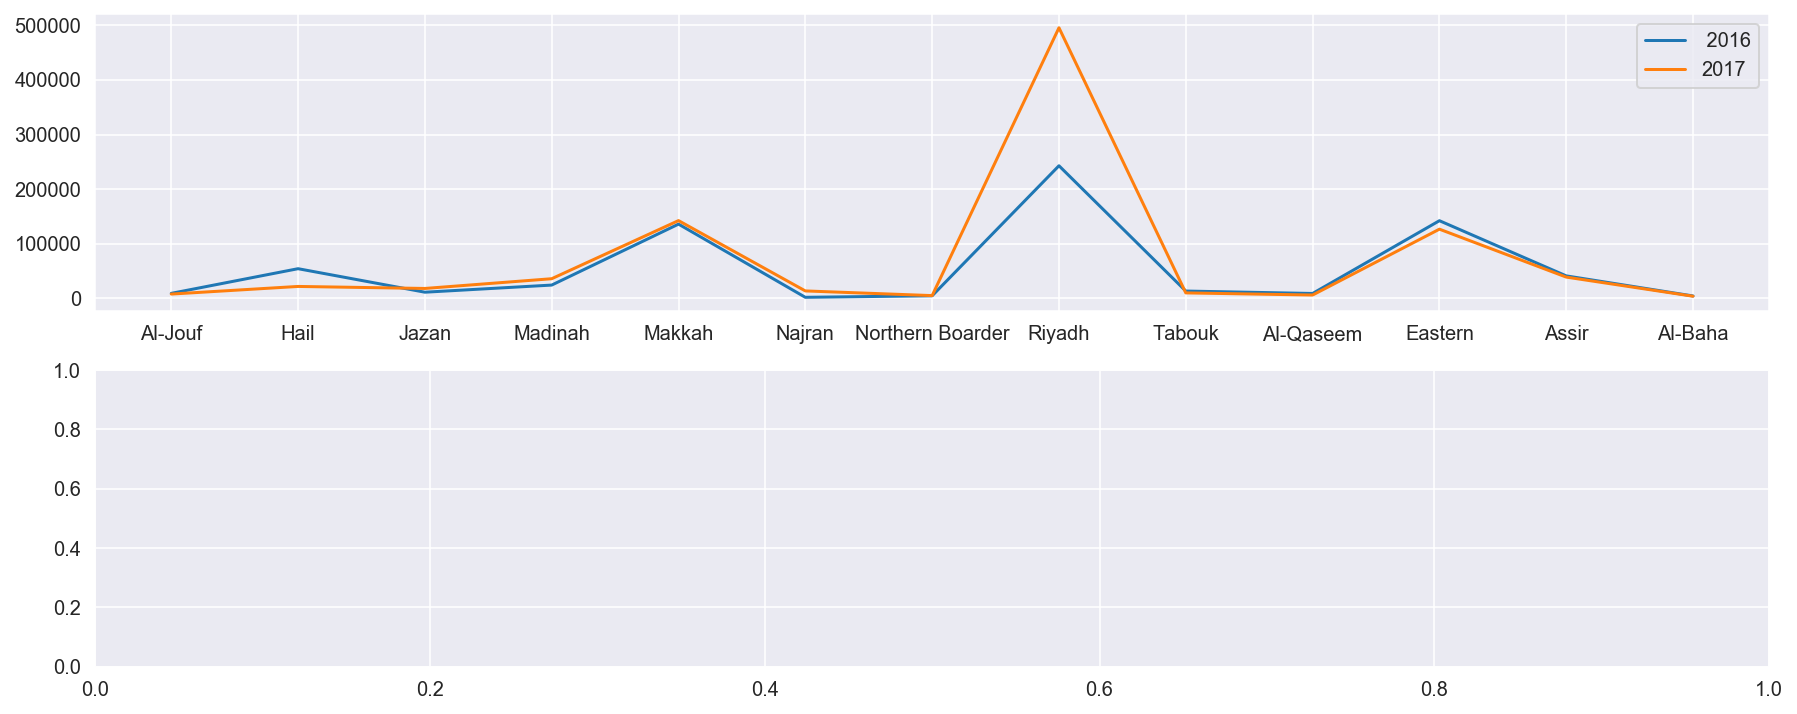

In [147]:
# THE PLOT SHOW THE REGION THAT HAVE THE HIGHEST AND LOWEST Driving Licenses
fig, p = plt.subplots(2, figsize=(15, 6))
x1 = d_merge.loc[d_merge['year'] == 2016]["region"]
y1 = d_merge.loc[d_merge['year'] == 2016]['driving_licenses']
x2 = d_merge.loc[d_merge['year'] == 2017]["region"]
y2 = d_merge.loc[d_merge['year'] == 2017]['driving_licenses']
p[0].plot(x1 , y1 , label=' 2016')
p[0].plot(x2 , y2 , label='2017')

p[0].legend(loc='upper right')
#plt.ylim(0,1000 , 50000)


In [148]:
#2
highTA = d_merge[d_merge['year'].isin([2016,2017])].groupby(['region','year']).mean().sort_values('no_of_accidents', ascending=False)
print (color.BOLD + color.YELLOW + "the highest mean Traffic Accidents in (2016 - 2017)is  : "+color.END) 
print (color.BOLD + color.BLUE + "- Makkah(2017)", '\n', '- Riyadh(2016)'+color.END) 
highTA.head(n=2)

the highest mean Traffic Accidents in (2016 - 2017)is  : 
- Makkah(2017) 
 - Riyadh(2016)


no_of_accidents  no_of_casualties_dead  \
region year                                             
Makkah 2017.0         140189.5                 1942.0   
       2016.0         140189.5                 1942.0   

               no_of_casualties_injured  driving_licenses          x         y  
region year                                                                     
Makkah 2017.0                   11503.0          142487.0  21.628963  41.26369  
       2016.0                   11503.0          136055.0  21.628963  41.26369

In [149]:
lowsTA = d_merge[d_merge['year'].isin([2016,2017])].groupby(['region','year']).mean().sort_values('no_of_accidents', ascending=False)
print (color.BOLD + color.YELLOW + "the lowest mean Traffic Accidents in (2016 - 2017) is : "+color.END) 
print (color.BOLD + color.BLUE + " - Al-baha(2016)"+color.END) 
lowsTA.tail(n=2)


the lowest mean Traffic Accidents in (2016 - 2017) is : 
 - Al-baha(2016)


,,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,driving_licenses,x,y
region,year,,,,,,
Al-Qaseem,2016.0,0.0,0.0,0.0,9180.0,26.196706,43.343000
Al-Baha,2016.0,0.0,0.0,0.0,4614.0,20.148406,41.466548


In [150]:
d_merge.head()

,region,no_of_accidents,no_of_casualties_dead,no_of_casualties_injured,year,driving_licenses,x,y
0,Al-Baaha,3618.0,185.0,1227.0,NaN,0.0,0.000000,0.000000
1,Al-Baaha,1414.0,134.0,1007.0,NaN,0.0,0.000000,0.000000
2,Al-Jouf,10212.0,245.0,920.0,2010.0,10937.0,29.967745,39.557037
3,Al-Jouf,10212.0,245.0,920.0,1996.0,2518.0,29.967745,39.557037
4,Al-Jouf,10212.0,245.0,920.0,2000.0,4666.0,29.967745,39.557037


In [151]:
#3 #What are the regions that have more Driving Licenses issued in each year than the year average

year_ml = d_merge.groupby('year', as_index= False)['driving_licenses'].mean() 
years = year_ml[['year', 'driving_licenses']].astype(int).values
years = dict(years)
d_merge['means'] = d_merge['year'].map(years)
gg = d_merge[d_merge['driving_licenses']> d_merge['means']].sort_values('year')

gg = gg.drop("no_of_casualties_injured" ,axis=1)
gg = gg.drop( 'no_of_casualties_dead' ,axis=1)
gg = gg.drop( 'y' ,axis=1)
gg = gg.drop( 'x' ,axis=1)
gg = gg.drop( 'no_of_accidents' ,axis=1)
print (color.BOLD + color.DARKCYAN + " The regions that have more Driving Licenses than the year average : "+color.END)
gg

 The regions that have more Driving Licenses than the year average : 


,region,year,driving_licenses,means
476,Al-Qaseem,1993.0,73618.0,22577.0
223,Makkah,1993.0,65977.0,22577.0
248,Makkah,1993.0,65977.0,22577.0
365,Riyadh,1993.0,103886.0,22577.0
390,Riyadh,1993.0,103886.0,22577.0
...,...,...,...,...
484,Eastern,2017.0,126816.0,76360.0
246,Makkah,2017.0,142487.0,76360.0
221,Makkah,2017.0,142487.0,76360.0
376,Riyadh,2017.0,495307.0,76360.0


In [152]:
#4 #What are the regions that have more Traffic Accidents happened in each year than the year average?
year_ml = d_merge.groupby('year', as_index= False)['no_of_accidents'].mean() 
years = year_ml[['year', 'no_of_accidents']].astype(int).values
years = dict(years)
d_merge['means'] = d_merge['year'].map(years)
gg = d_merge[d_merge['no_of_accidents']> d_merge['means']].sort_values('year')

gg = gg.drop("no_of_casualties_injured" ,axis=1)
gg = gg.drop( 'no_of_casualties_dead' ,axis=1)
gg = gg.drop( 'y' ,axis=1)
gg = gg.drop( 'x' ,axis=1)
gg = gg.drop( 'driving_licenses' ,axis=1)
print (color.BOLD + color.DARKCYAN + " There is 7 regions have more Traffic Accidents than the year average  : "+color.END) 
gg



 There is 7 regions have more Traffic Accidents than the year average  : 


,region,no_of_accidents,year,means
390,Riyadh,99925.0,1993.0,31808.0
365,Riyadh,141736.0,1993.0,31808.0
223,Makkah,134838.0,1993.0,31808.0
248,Makkah,145541.0,1993.0,31808.0
207,Makkah,134838.0,1994.0,31808.0
...,...,...,...,...
247,Makkah,145541.0,2016.0,31808.0
376,Riyadh,141736.0,2017.0,31808.0
221,Makkah,134838.0,2017.0,31808.0
401,Riyadh,99925.0,2017.0,31808.0


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

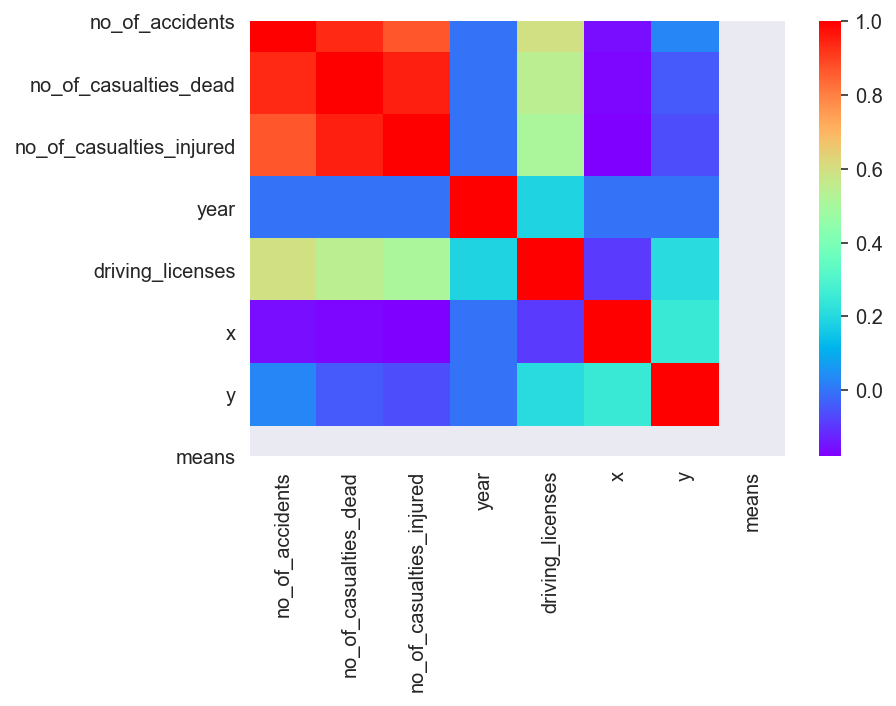

In [153]:
sns.heatmap(d_merge.corr() , cmap='rainbow')

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [154]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2) )# Makes sure you have enough rows
    fig, ax = plt.subplots(nrows=nrows, ncols=2) # You'll want to specify your figsize
    ax = ax.ravel() # Ravel turns a matrix into a vector, which is easier to iterate
    for i, column in enumerate(list_of_columns): # Gives us an index value to get into all our lists
        ax[i].hist(dataframe[column]) # feel free to add more settings
        # Set titles, labels, etc here for each subplot

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

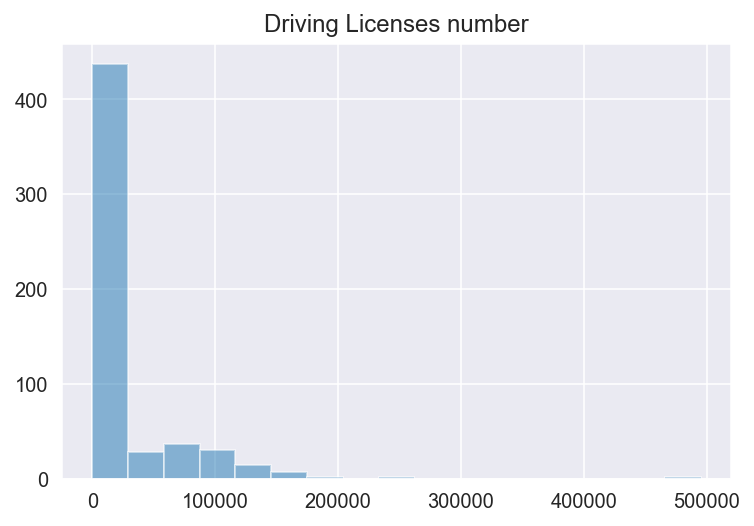

In [155]:
# Code
#plt.plot(d_merge['driving_licenses'])
#plt.show()
plt.title( 'Driving Licenses number' )
plt.hist(x= d_merge['driving_licenses'], bins = 17 , alpha=0.5)
plt.show()

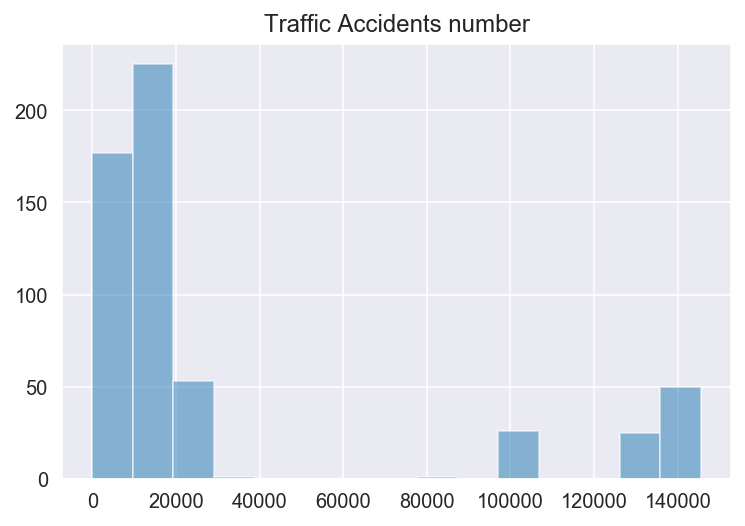

In [156]:
plt.title('Traffic Accidents number')
plt.hist(x= d_merge['no_of_accidents'], bins = 15 , alpha=0.5)
plt.show()

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [157]:
def scatterplot(x, y, title, xlabel, ylabel,df):
    plt.figure(figsize=(12,4))
    x = df[x] 
    y = df[y]
    sns.barplot(x,y) 
    #sns.regplot(x,y)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    x= np.arange(0,11)

Text(0.5, 1.0, 'Driving Licenses vs. Traffic Accidents - 2017 ')

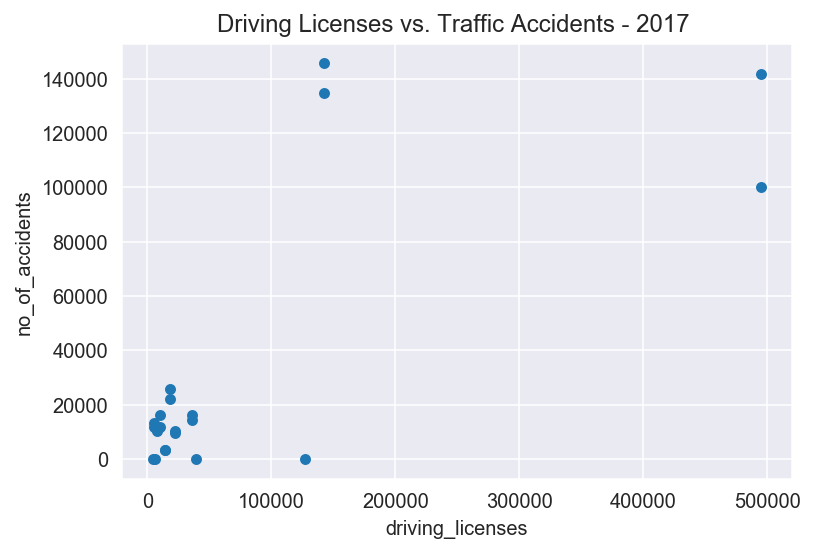

In [158]:
#Driving Licenses vs. Traffic Accidents - 2017
y17 = d_merge[d_merge['year'] == 2017]
y17.plot(kind='scatter', x='driving_licenses', y='no_of_accidents', s=20)
plt.title( 'Driving Licenses vs. Traffic Accidents - 2017 ' )
#I don't see any meaning with this scatter plot 

(0, 40000)

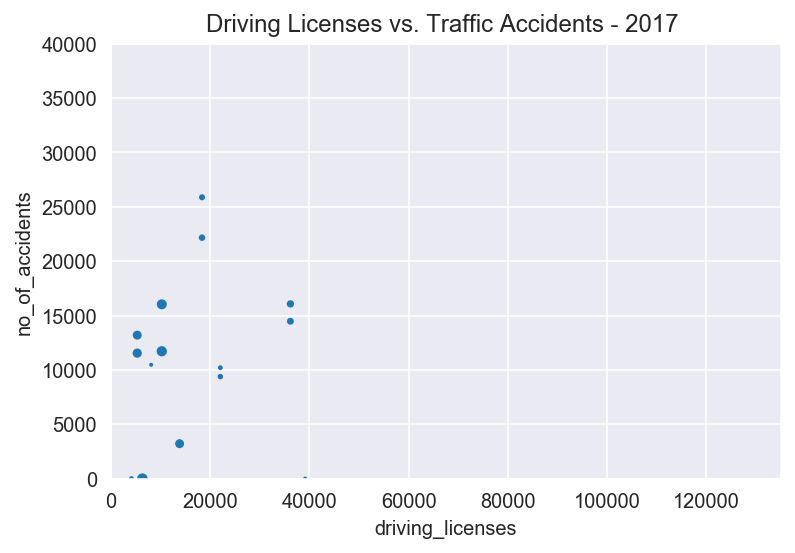

In [159]:
#--> plotting with aout autlier 
#Driving Licenses vs. Traffic Accidents - 2017 #2
y17 = d_merge[d_merge['year'] == 2017]
gf = np.arange(0,19)
y17.plot(kind='scatter', x='driving_licenses', y='no_of_accidents', s=range(0,19))
plt.title( 'Driving Licenses vs. Traffic Accidents - 2017 ' )
plt.xlim(0 , 135000)
plt.ylim(0, 40000)


Text(0.5, 1.0, 'Driving Licenses vs. Traffic Accidents - 2016 ')

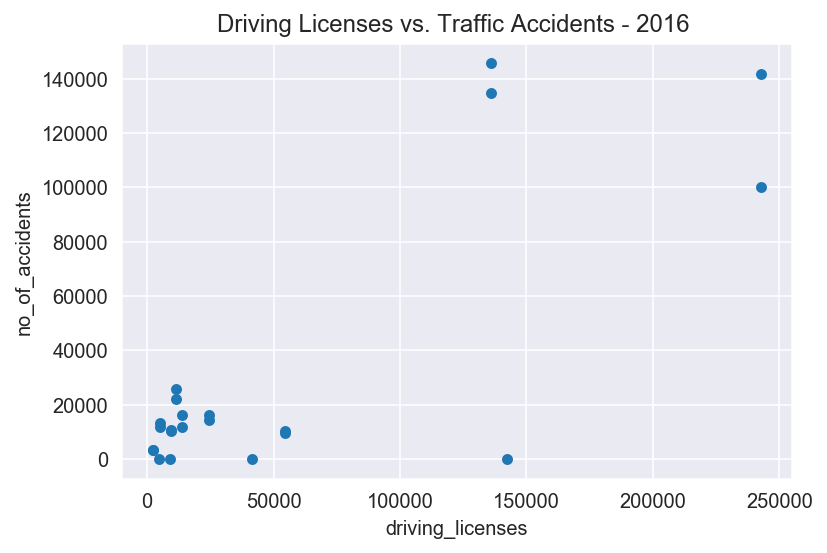

In [160]:
#Driving Licenses vs. Traffic Accidents - 2016 #1
y16 = d_merge[d_merge['year'] == 2016]
y16.plot(kind='scatter', x='driving_licenses', y='no_of_accidents', s=20)
plt.title( 'Driving Licenses vs. Traffic Accidents - 2016 ' )

(0, 30000)

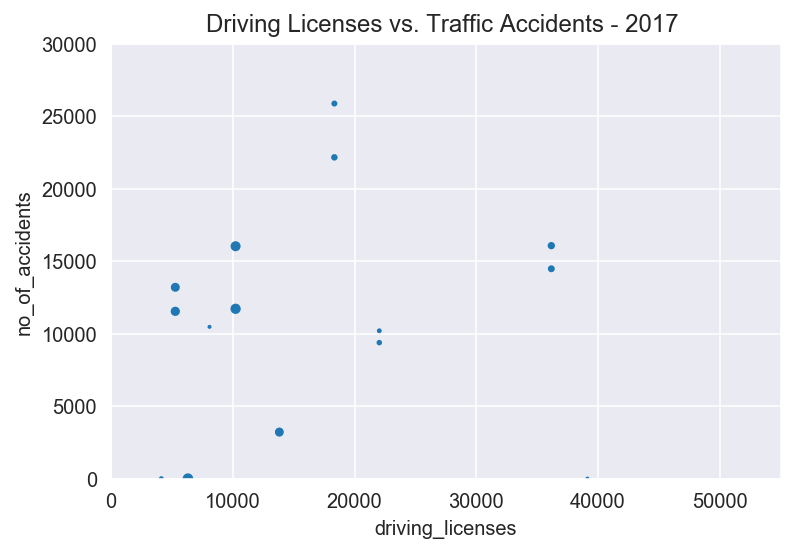

In [161]:
#-->  also with aout autlier #2
y16 = d_merge[d_merge['year'] == 2017]
gf = np.arange(0,19)
y16.plot(kind='scatter', x='driving_licenses', y='no_of_accidents', s=range(0,19))
plt.title( 'Driving Licenses vs. Traffic Accidents - 2017 ' )
plt.xlim(0 , 55000)
plt.ylim(0, 30000)


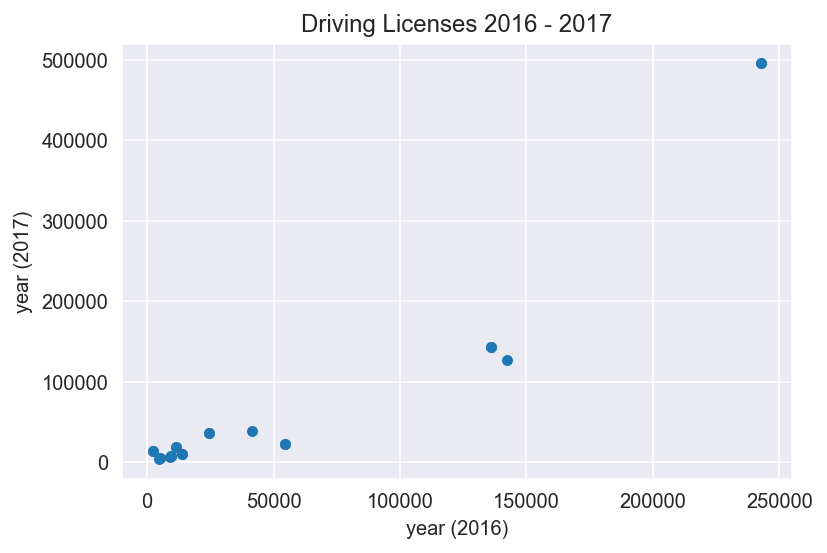

In [162]:
#Driving Licenses 2016 - 2017
l16 = d_merge['year'] == 2016, "driving_licenses"
l17 = d_merge['year'] == 2017, "driving_licenses"
plt.title('Driving Licenses 2016 - 2017')
plt.xlabel('year (2016)')
plt.ylabel('year (2017)')
lic16 = d_merge.loc[l16]
lic17 = d_merge.loc[l17]
plt.scatter(lic16, lic17, s=20)



(0, 80000)

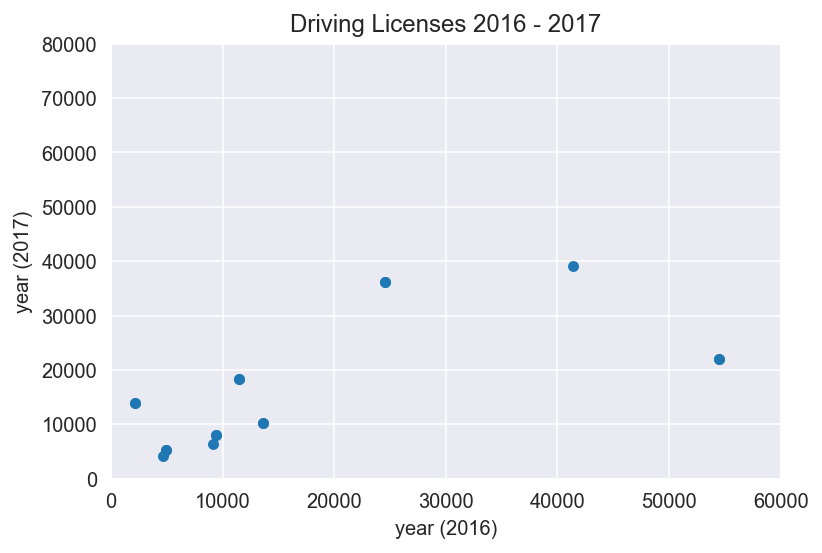

In [163]:
#Driving Licenses 2016 - 2017 #2
l16 = d_merge['year'] == 2016, "driving_licenses"
l17 = d_merge['year'] == 2017, "driving_licenses"
plt.title('Driving Licenses 2016 - 2017')
plt.xlabel('year (2016)')
plt.ylabel('year (2017)')
lic16 = d_merge.loc[l16]
lic17 = d_merge.loc[l17]
plt.scatter(lic16, lic17, s=20)
plt.xlim(0 , 60000)
plt.ylim(0, 80000)


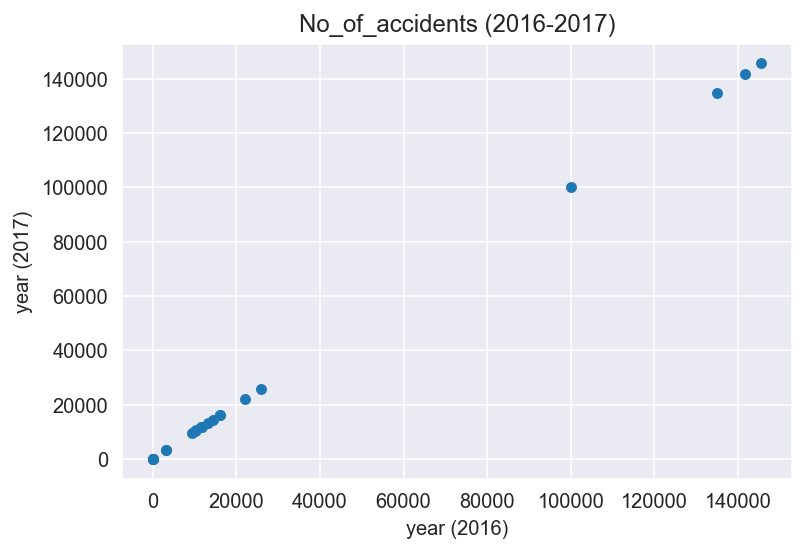

In [164]:
#o_of_accidents (2016-2017)
l16 = d_merge['year'] == 2016, "no_of_accidents"
l17 = d_merge['year'] == 2017, "no_of_accidents"
plt.title('No_of_accidents (2016-2017)')
plt.xlabel('year (2016)')
plt.ylabel('year (2017)')
lic16 = d_merge.loc[l16]
lic17 = d_merge.loc[l17]
plt.scatter(lic16, lic17, s=20)



#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.0, 'result of accidents')

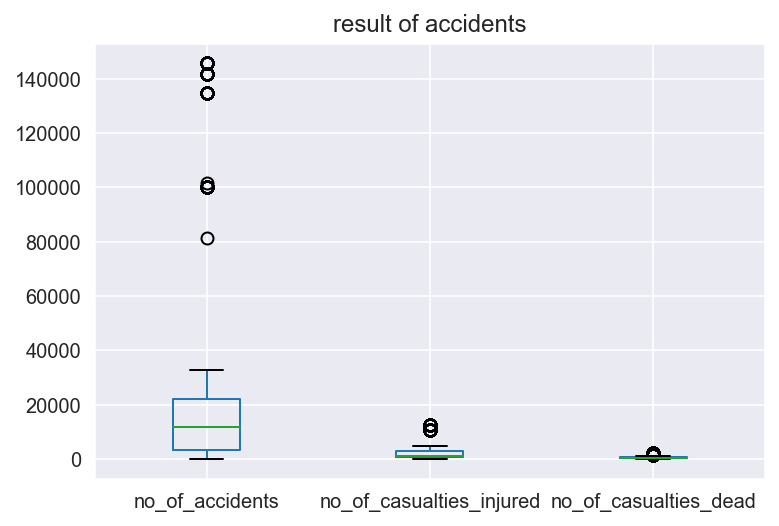

In [165]:

boxplot = d_merge.boxplot(column=['no_of_accidents', 'no_of_casualties_injured', 'no_of_casualties_dead'] )
plt.title('result of accidents')


Text(0.5, 1.0, 'No. driving licenses')

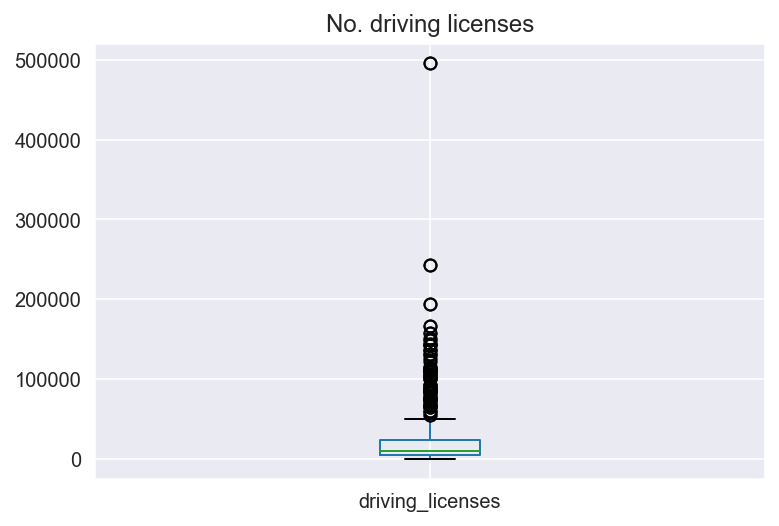

In [166]:
boxplot = d_merge.boxplot(column=['driving_licenses'] )
plt.title('No. driving licenses')

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

when we compare between 2016 - 2017 , 2017 Less accidents occurred  #1

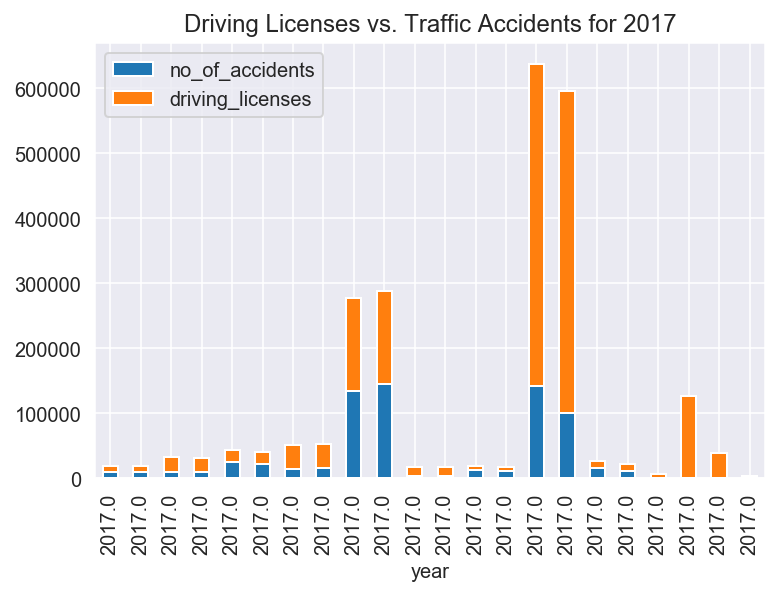

In [167]:
#1
y17 = d_merge[d_merge['year'] == 2017]
dg = d_merge.groupby('year').sum
y17.plot(kind='bar', x='year', y=['no_of_accidents','driving_licenses'],title='Driving Licenses vs. Traffic Accidents for 2017', stacked=True)


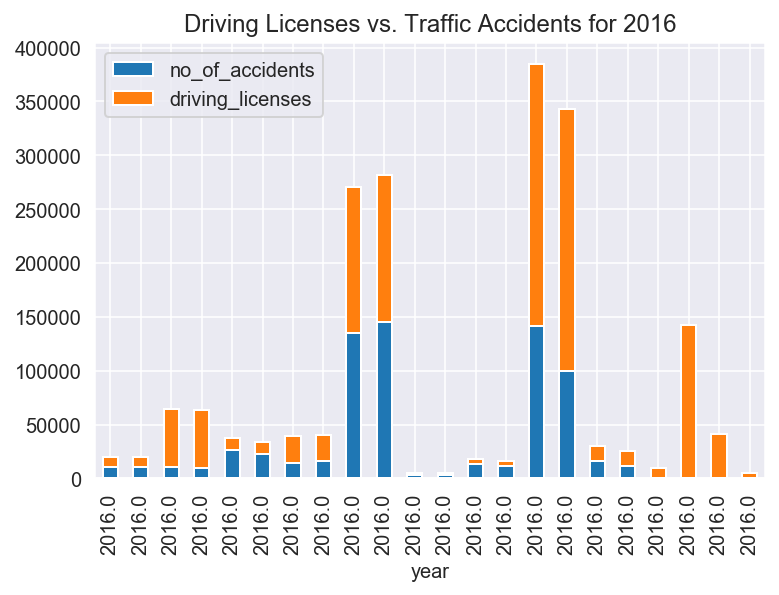

In [168]:
#1
y16 = d_merge[d_merge['year'] == 2016]
y16.plot(kind='bar', x='year', y=['no_of_accidents','driving_licenses'],title='Driving Licenses vs. Traffic Accidents for 2016' , stacked=True)

#subplots=True


This plot show the number of accidents , Makkah has the highest number of accidents #2

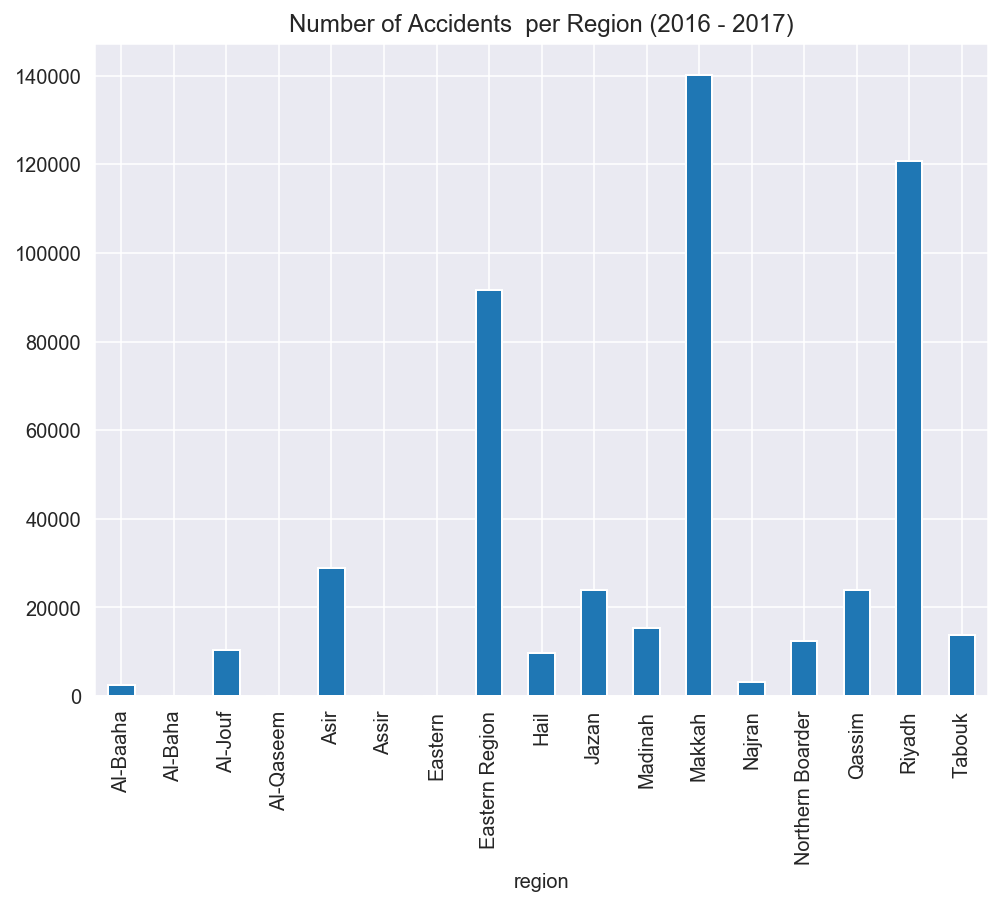

In [169]:
#2
d_merge.groupby('region')['no_of_accidents'].mean().plot(kind='bar',figsize=(8,6))
plt.title('Number of Accidents  per Region (2016 - 2017)')
plt.xlabel('region')
plt.show()

plot show How many injured and dead per city #3
Hail and northern borders the number of dead is highe relative to nmber of accidents happend

Text(0.5, 1.0, 'no of casualties ( injured \\ dead ) in each city (2017) ')

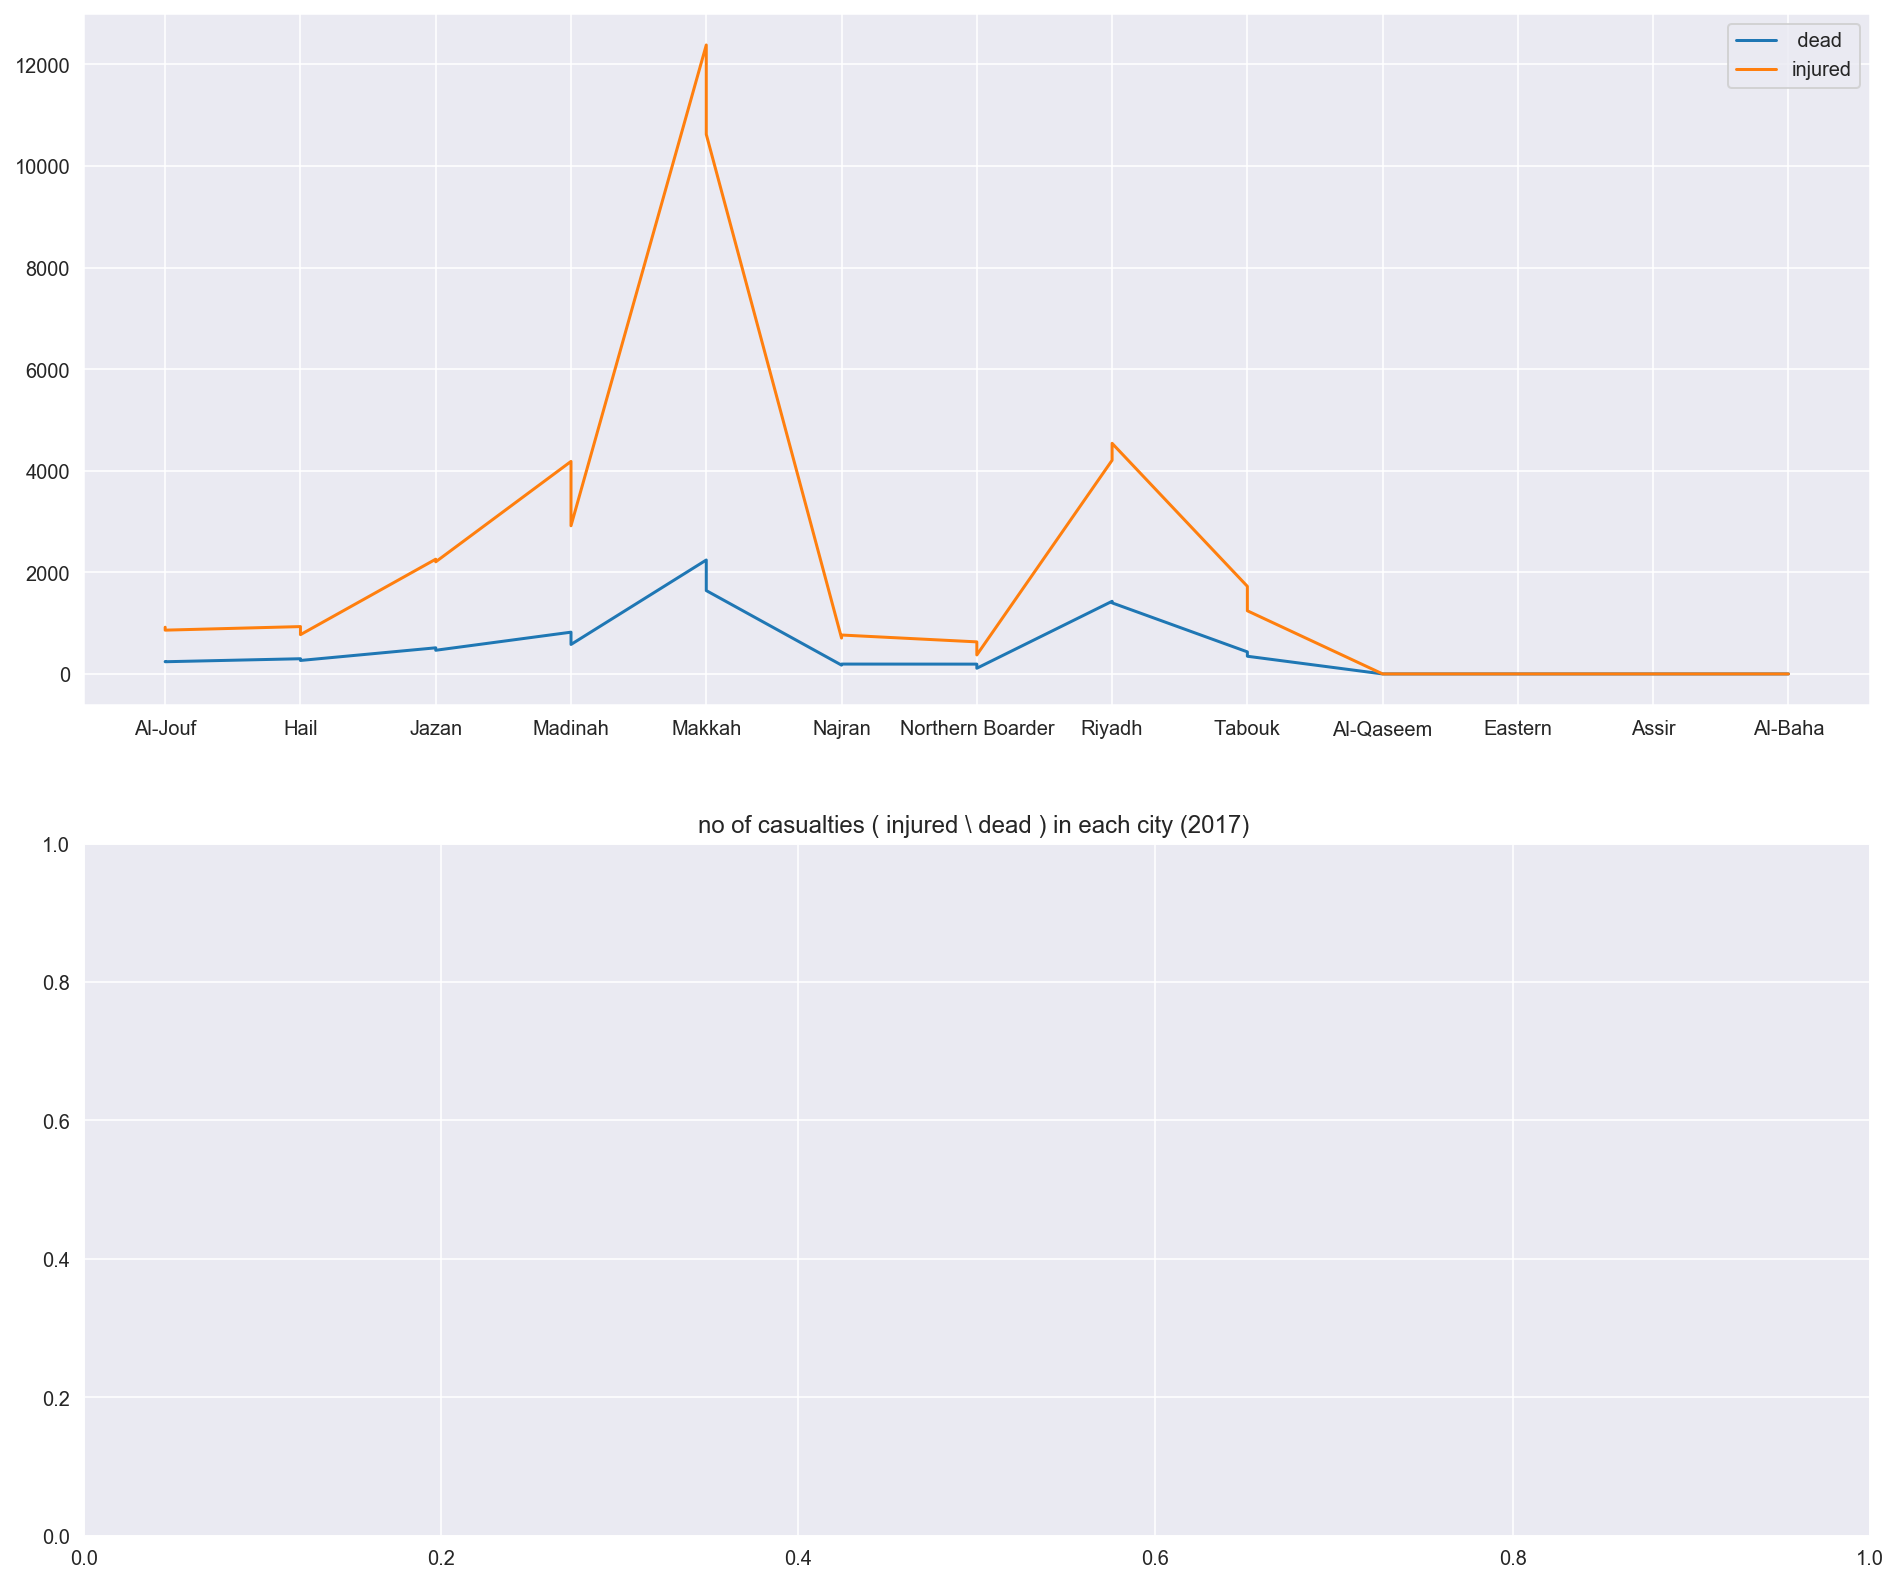

In [170]:
fig, p = plt.subplots(2, figsize=(16, 14))
x1 = d_merge.loc[d_merge['year'] == 2017]["region"]
y1 = d_merge.loc[d_merge['year'] == 2017]['no_of_casualties_dead']
x2 = d_merge.loc[d_merge['year'] == 2017]["region"]
y2 = d_merge.loc[d_merge['year'] == 2017]['no_of_casualties_injured']
p[0].plot(x1 , y1 , label=' dead')
p[0].plot(x2 , y2 , label='injured')
p[0].legend(loc='upper right')
plt.title('no of casualties ( injured \ dead ) in each city (2017) ')

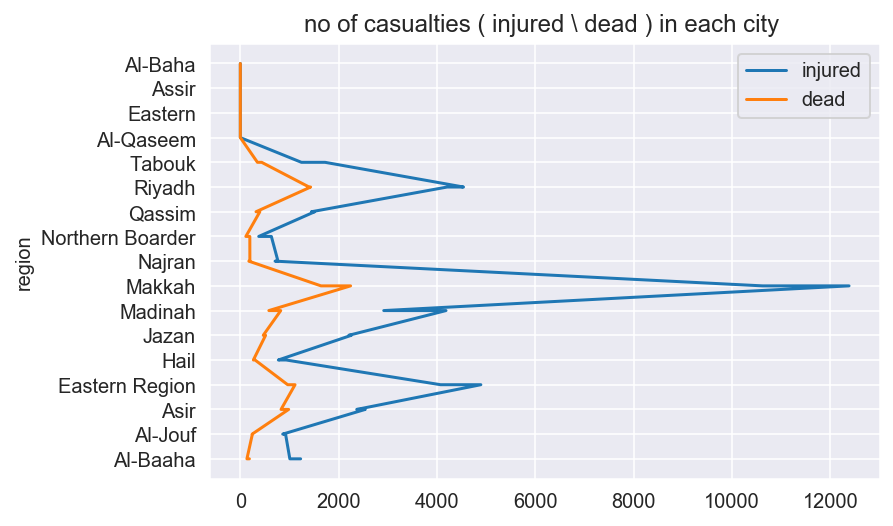

In [1096]:
#3
plt.plot(d_merge['no_of_casualties_injured'] , d_merge['region'])
plt.plot (d_merge[ 'no_of_casualties_dead'] , d_merge['region'])
plt.legend(['injured' ,'dead' ])
plt.title('no of casualties ( injured \ dead ) in each city ')
plt.ylabel('region')
plt.show()

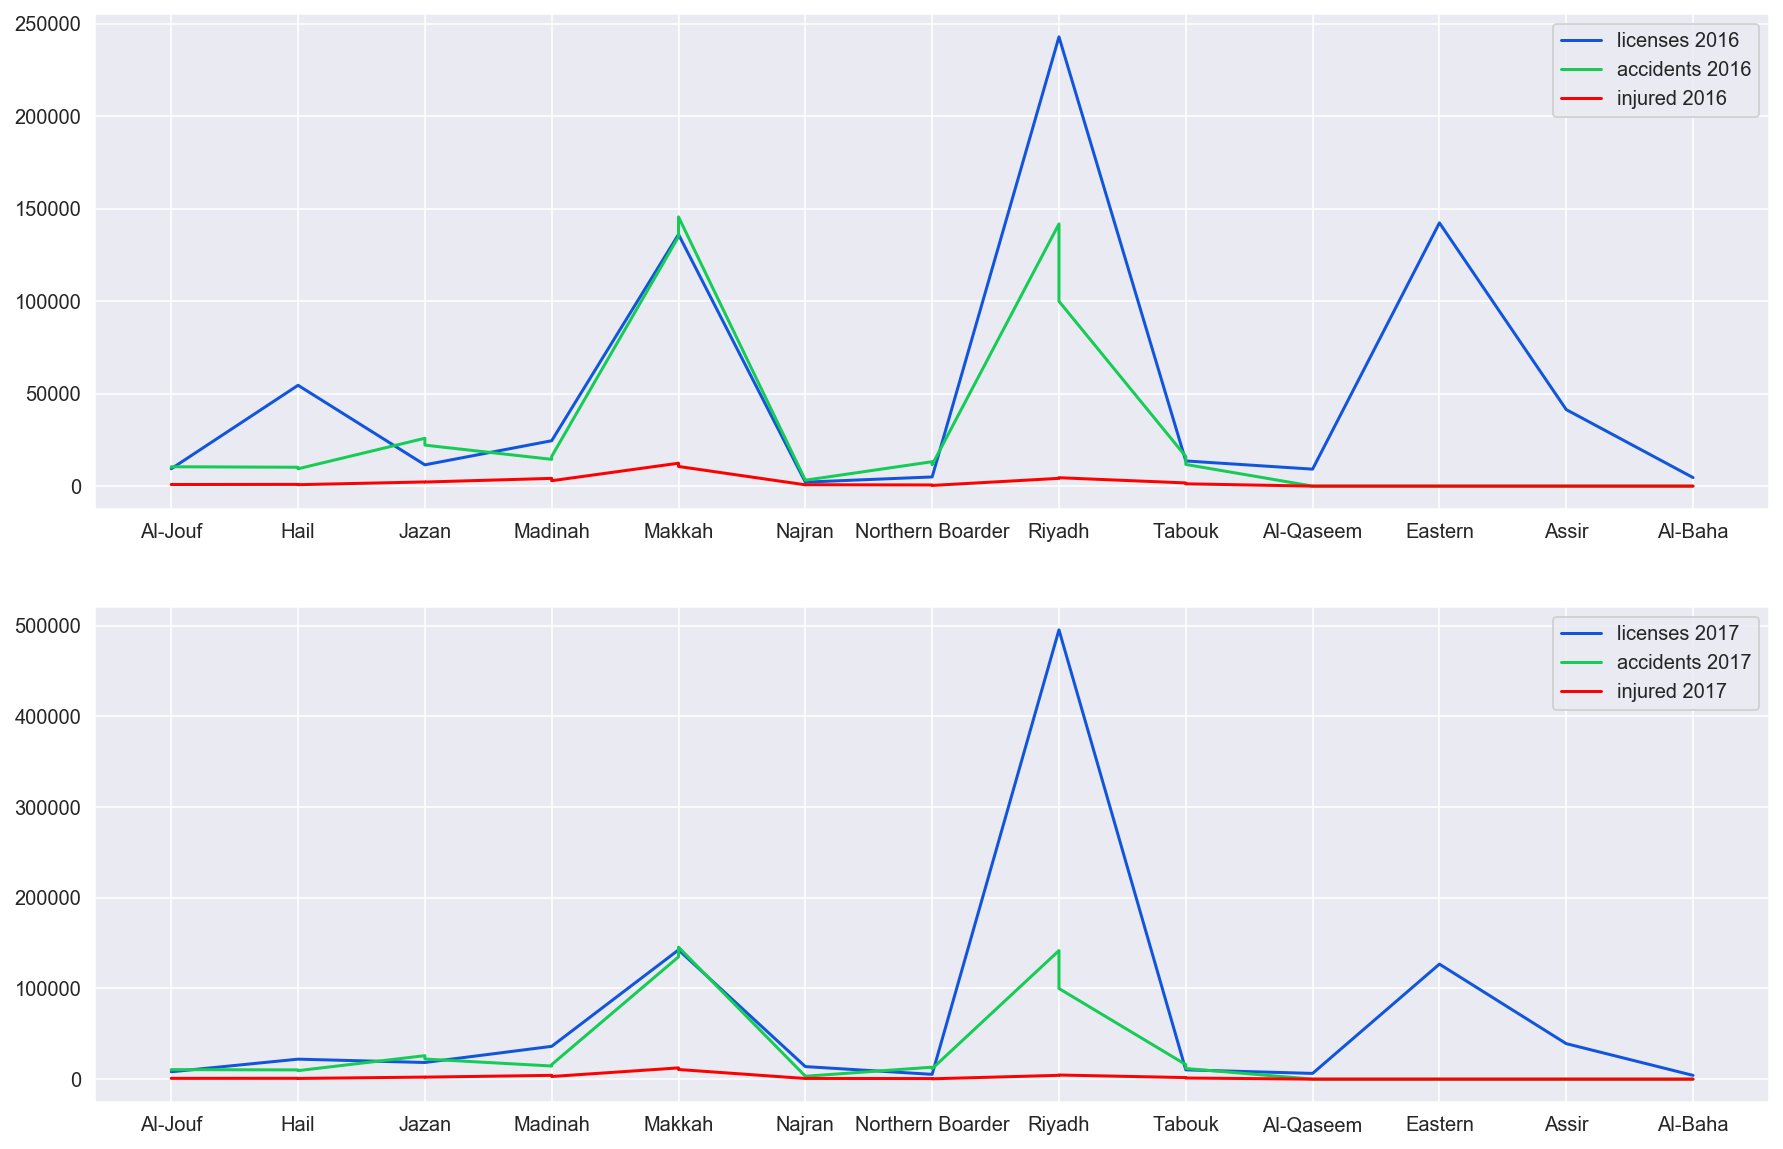

In [1099]:
#4
x1 = d_merge.loc[d_merge['year'] == 2016]["region"]
y1 = d_merge.loc[d_merge['year'] == 2016]['driving_licenses']
z1 = d_merge.loc[d_merge['year'] == 2016]['no_of_accidents']
k1 = d_merge.loc[d_merge['year'] == 2016]['no_of_casualties_injured']
x2 = d_merge.loc[d_merge['year'] == 2017]["region"]
y2 = d_merge.loc[d_merge['year'] == 2017]['driving_licenses']
z2 = d_merge.loc[d_merge['year'] == 2017]['no_of_accidents']
k2 = d_merge.loc[d_merge['year'] == 2017]['no_of_casualties_injured']


fig, ax = plt.subplots(2, figsize=(15, 10))
ax[0].plot(x1, y1,  label='licenses 2016' , color="#1155dd")
ax[0].plot(x1, z1,  label='accidents 2016' , color="#15cc55")
ax[0].plot(x1, k1,  label='injured 2016', color="red")
ax[0].legend(loc='upper right')
ax[1].plot(x2, y2,  label='licenses 2017', color="#1155dd")
ax[1].plot(x2, z2,  label='accidents 2017', color="#15cc55")
ax[1].plot(x2,k2,  label='injured 2017', color="red")
ax[1].legend(loc='upper right')
plt.show()

In [ ]:
#plt.plot(d_merge['driving_licenses']  )
#plt.plot(d_merge['no_of_accidents'] , color="yellow")
#plt.legend(['driving_licenses' , 'no_of_accidents'])
#plt.title('Drivinglicenses and No. of accidents (2016)')
#plt.xlabel(set_ylim([0, 1]))
#plt.ylabel('year')
#plt.show()

#DLETE

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

Answers:

In [1024]:
d_merge.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_accidents,558.0,31879.448029,47516.248476,0.0,3235.000000,11713.000000,22161.000000,145541.000000
no_of_casualties_dead,558.0,528.444444,593.795708,0.0,173.000000,299.000000,580.000000,2243.000000
no_of_casualties_injured,558.0,2375.166667,3185.930092,0.0,631.000000,932.000000,2917.000000,12383.000000
year,550.0,2005.000000,7.217667,1993.0,1999.000000,2005.000000,2011.000000,2017.000000
driving_licenses,558.0,27737.948029,48487.089924,0.0,4603.000000,9873.000000,23479.000000,495307.000000
x,558.0,23.758933,5.176202,0.0,20.148406,23.288331,27.901655,30.197075
y,558.0,41.656526,5.903243,0.0,39.557037,41.466548,43.343000,50.147830
means,550.0,31808.000000,0.000000,31808.0,31808.000000,31808.000000,31808.000000,31808.000000


In [1074]:
def trimmean(arr, percent):
    lower_limit = scoreatpercentile(arr, percent)
    upper_limit = scoreatpercentile(arr, 100-percent)
    return tmean(arr, limits=(lower_limit, upper_limit), inclusive=(False, False))

mean = d_merge['no_of_accidents'].mean()
median = d_merge['no_of_accidents'].median()
mode = d_merge['no_of_accidents'].mode()
trimmed = trimmean(d_merge["no_of_accidents"].values,10)
print(color.BOLD + color.BLUE + 'no_of_accidents:' +color.END )
print ( trimmed)
print (mean )
print(median )
print(mode)
print (color.YELLOW +'positively skewed distribution'+color.END)

mean = d_merge['driving_licenses'].mean()
median = d_merge['driving_licenses'].median()
mode = d_merge['driving_licenses'].mode()
trimmed = trimmean(d_merge["driving_licenses"].values,10)
print('\n',color.BOLD + color.BLUE + 'driving_licenses:' +color.END,)
print ( trimmed)
print (mean )
print(median )
print(mode)
print (color.YELLOW +'positively skewed distribution'+color.END)

mean = d_merge['no_of_casualties_dead'].mean()
median = d_merge['no_of_casualties_dead'].median()
mode = d_merge['no_of_casualties_dead'].mode()
trimmed = trimmean(d_merge["no_of_casualties_dead"].values,10)
print('\n',color.BOLD + color.BLUE + 'no_of_casualties_dead:' +color.END,)
print ( trimmed)
print (mean )
print(median )
print(mode)
print (color.YELLOW +'positively skewed distribution'+color.END)

mean = d_merge['no_of_casualties_injured'].mean()
median = d_merge['no_of_casualties_injured'].median()
mode = d_merge['no_of_casualties_injured'].mode()
trimmed = trimmean(d_merge["no_of_casualties_injured"].values,10)
print('\n',color.BOLD + color.BLUE + 'no_of_casualties_injured:' +color.END,)
print ( trimmed)
print (mean )
print(median )
print(mode)
print (color.YELLOW +'positively skewed distribution'+color.END)

no_of_accidents:
18892.577023498696
31879.448028673836
11713.0
0    0.0
dtype: float64
positively skewed distribution

 driving_licenses:
16657.853603603602
27737.948028673836
9873.0
0    0.0
dtype: float64
positively skewed distribution

 no_of_casualties_dead:
423.03394255874673
528.4444444444445
299.0
0    0.0
dtype: float64
positively skewed distribution

 no_of_casualties_injured:
1653.9267015706807
2375.1666666666665
932.0
0    0.0
dtype: float64
positively skewed distribution


In [1062]:
licenses_range = d_merge[['driving_licenses']].max() - d_merge[['driving_licenses']].min()
print (color.RED +'licenses range:'+color.END )
print (licenses_range)

accidents_range = d_merge[['no_of_accidents']].max() - d_merge[['no_of_accidents']].min()
print (color.RED +'accidents range:'+color.END )
print (accidents_range)

injured_range = d_merge[['no_of_casualties_injured']].max() - d_merge[['no_of_casualties_injured']].min()
print (color.RED +'injured_range:'+color.END )
print (injured_range)

deaths_range = d_merge[['no_of_casualties_dead']].max() - d_merge[['no_of_casualties_dead']].min()
print (color.RED +'deaths_range:'+color.END )
print ( deaths_range)


licensesrange:
driving_licenses    495307.0
dtype: float64
accidents range:
no_of_accidents    145541.0
dtype: float64
injured_range:
no_of_casualties_injured    12383.0
dtype: float64
deaths_range:
no_of_casualties_dead    2243.0
dtype: float64


In [ ]:
# After all these calculations , also from plotting
Accidents:  Medain is (11713.0) There are two outliers Makkah and Riyadh with accident above (10.000), Range of accident is( 14554.01) and andstandard deviation is (s=47473.652099826344).
Licenses: Medain is ( 9873.0)  Riyadh is outlier, Range of licenses is (145541.0)  and the standard deviation is (s= 48443.623227534066).
Casualties(injured): Median is (932.0)  there is outlier Makkah. Range of the values is (12383.0)  and the standard deviation is (s= 3183.0740353494843).
Casualties(dead): Median is (299.0)  two outlier Riyadh and Makkah, Range of the values is (2243.0) and the standard deviation is (s = 593.2633941167171). 
Most region The number of deaths by accidents is few and some are not
with mean casualty deaths above 1000 per year.

In [1071]:
d_std = np.std(d_merge['driving_licenses'])
print (color.BLUE +'driving licenses standard deviation :'+color.END )
print(d_std)

a_std = np.std(d_merge['no_of_accidents'])
print (color.BLUE +'No ofaccidents standard deviation :'+color.END )
print(a_std)

i_std = np.std(d_merge['no_of_casualties_injured'])
print (color.BLUE +'injured standard deviation :'+color.END )
print(i_std)

d_std = np.std(d_merge['no_of_casualties_dead'])
print (color.BLUE +'Dead standard deviation :'+color.END )
print(d_std)



driving licenses standard deviation :
48443.623227534066
No ofaccidents standard deviation :
47473.652099826344
injured standard deviation :
3183.0740353494843
Dead standard deviation :
593.2633941167171


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:

In [ ]:
The datasets represent positive skewness 

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [ ]:

H0: The difference between number of No.accidents (1993 -1999)  and  number of No.accidents in (2000-2017) = 0

H1: The difference between number of N0.accidents (1993 -1999)  and  number of No.accidents in (2000-2017)  != 0

In [1]:
#by t-test ->
#from itertools import islice
#gorub1 = d_merge.loc[1993,1994,1995,1996,1997,1998,1999:].driving_licenses
#groub2 = d_merge.loc[2011,2012,2013,2014,2015,2016,2017:].driving_licenses


#t_test = stats.ttest_ind(gorub1, gorub2)
#p_value = t_test.pvalue
#t_value = t_test.statistic 

#print( 'P-value:'+ P-value + 'T-value:'+ t_value)


## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

In [ ]:
Riyadh , Makkah , Assir 
